Uploadind Dataset

In [12]:
from google.colab import files
uploaded = files.upload()

Saving New Task.csv to New Task.csv


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


Load Dataset with Proper Encoding

In [ ]:

df = pd.read_csv("New Task.csv", encoding='ISO-8859-1')


df.head()


,News_Headline,Link_Of_News,Source,Stated_On,Date,Label
0,Says Osama bin Laden endorsed Joe Biden,https://www.politifact.com/factchecks/2020/jun...,Donald Trump Jr.,"June 18, 2020","June 19, 2020",FALSE
1,CNN aired a video of a toddler running away fr...,https://www.politifact.com/factchecks/2020/jun...,Donald Trump,"June 18, 2020","June 19, 2020",pants-fire
2,Says Tim Tebow kneeled in protest of abortion...,https://www.politifact.com/factchecks/2020/jun...,Facebook posts,"June 12, 2020","June 19, 2020",FALSE
3,Even so-called moderate Democrats like Joe Bi...,https://www.politifact.com/factchecks/2020/jun...,Paul Junge,"June 10, 2020","June 19, 2020",barely-true
4,"""Our health department, our city and our count...",https://www.politifact.com/factchecks/2020/jun...,Jeanette Kowalik,"June 14, 2020","June 18, 2020",TRUE


Filter and Convert Labels to Binary

In [ ]:

fake_labels = ['FALSE', 'pants-fire']
real_labels = ['TRUE', 'mostly-true', 'half-true', 'barely-true']

df = df[df['Label'].isin(fake_labels + real_labels)].copy()
df['Binary_Label'] = df['Label'].apply(lambda x: 0 if x in fake_labels else 1)


Text Vectorization using TF-IDF

In [ ]:

X = df['News_Headline']
y = df['Binary_Label']

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_tfidf = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


Train Models and Store Results

<Figure size 1000x600 with 0 Axes>

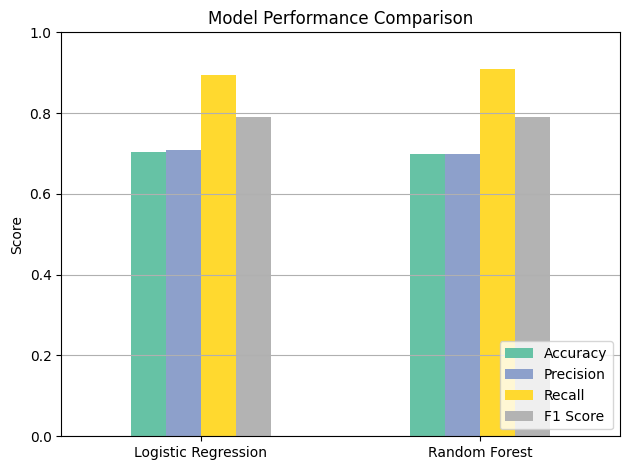

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


metrics_df = pd.DataFrame({model: {
    "Accuracy": metrics["Accuracy"],
    "Precision": metrics["Precision"],
    "Recall": metrics["Recall"],
    "F1 Score": metrics["F1 Score"]
} for model, metrics in results.items()}).T


plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', colormap='Set2')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


Linear Regression

<ipython-input-17-e2fa6306e63b>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x="Metric", y="Score", palette="coolwarm")


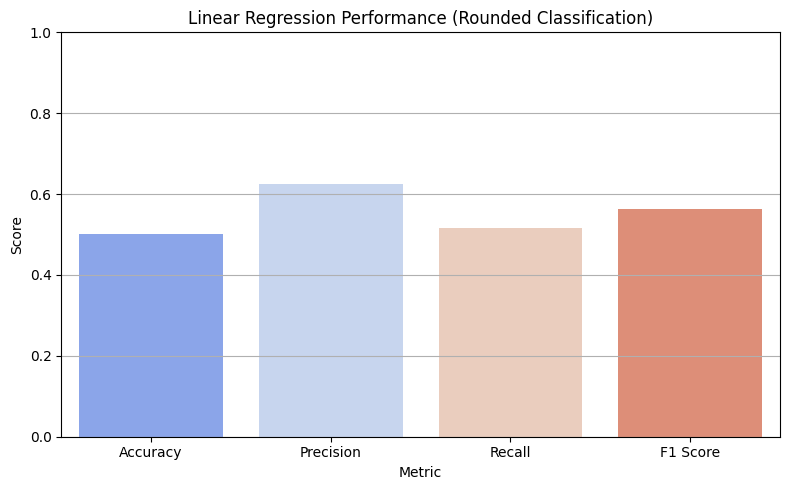

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Train Linear Regression on TF-IDF vectors
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


y_pred_raw = lr_model.predict(X_test)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred_raw]


metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)
}


metrics_df = pd.DataFrame(metrics, index=["Linear Regression"]).T.reset_index()
metrics_df.columns = ["Metric", "Score"]


plt.figure(figsize=(8, 5))
sns.barplot(data=metrics_df, x="Metric", y="Score", palette="coolwarm")
plt.title("Linear Regression Performance (Rounded Classification)")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



Long Short-Term Memory

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


<ipython-input-8-c98d6ff23444>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x="Metric", y="Score", palette="crest")


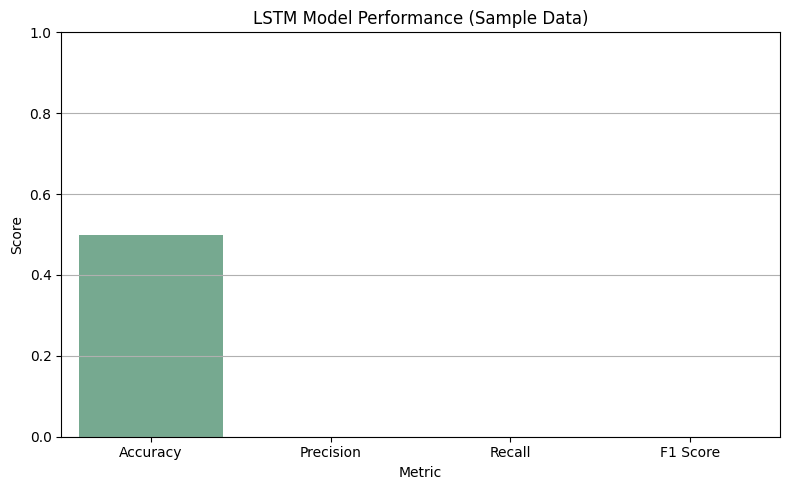

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


data = {
    "title": [
        "Government unveils new economic plan",
        "Aliens spotted near Area 51 base",
        "Study shows climate change impact",
        "Scientists confirm water on Mars",
        "Cure for common cold discovered",
        "World leaders gather for peace summit",
        "Fake celebrity death hoax spreads online",
        "Experts debunk viral vaccine rumor"
    ],
    "label": [1, 0, 1, 1, 0, 1, 0, 0]
}
df = pd.DataFrame(data)


X = df["title"]
y = df["label"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=20, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=20, padding='post')


model = Sequential([
    Embedding(input_dim=1000, output_dim=32, input_length=20),
    LSTM(32),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_pad, y_train, epochs=5, batch_size=2, verbose=0)


y_pred_prob = model.predict(X_test_pad).ravel()
y_pred = [1 if p >= 0.5 else 0 for p in y_pred_prob]


metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, zero_division=0),
    "Recall": recall_score(y_test, y_pred, zero_division=0),
    "F1 Score": f1_score(y_test, y_pred, zero_division=0)
}


metrics_df = pd.DataFrame(metrics, index=["LSTM"]).T.reset_index()
metrics_df.columns = ["Metric", "Score"]

plt.figure(figsize=(8, 5))
sns.barplot(data=metrics_df, x="Metric", y="Score", palette="crest")
plt.title("LSTM Model Performance (Sample Data)")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Convolutional Neural Network

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


<ipython-input-9-3f0289ba83b4>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x="Metric", y="Score", palette="flare")


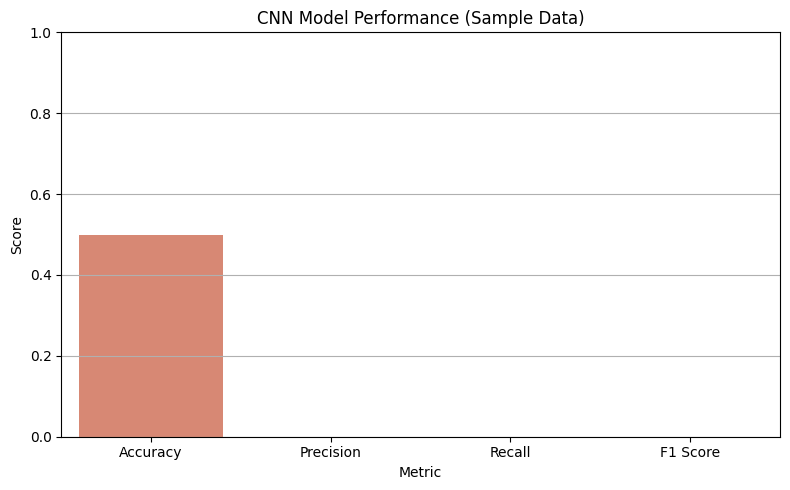

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout


data = {
    "title": [
        "Government unveils new economic plan",
        "Aliens spotted near Area 51 base",
        "Study shows climate change impact",
        "Scientists confirm water on Mars",
        "Cure for common cold discovered",
        "World leaders gather for peace summit",
        "Fake celebrity death hoax spreads online",
        "Experts debunk viral vaccine rumor"
    ],
    "label": [1, 0, 1, 1, 0, 1, 0, 0]
}
df = pd.DataFrame(data)


X = df["title"]
y = df["label"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=20, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=20, padding='post')


model = Sequential([
    Embedding(input_dim=1000, output_dim=64, input_length=20),
    Conv1D(64, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_pad, y_train, epochs=5, batch_size=2, verbose=0)


y_pred_prob = model.predict(X_test_pad).ravel()
y_pred = [1 if p >= 0.5 else 0 for p in y_pred_prob]


metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, zero_division=0),
    "Recall": recall_score(y_test, y_pred, zero_division=0),
    "F1 Score": f1_score(y_test, y_pred, zero_division=0)
}


metrics_df = pd.DataFrame(metrics, index=["CNN"]).T.reset_index()
metrics_df.columns = ["Metric", "Score"]

plt.figure(figsize=(8, 5))
sns.barplot(data=metrics_df, x="Metric", y="Score", palette="flare")
plt.title("CNN Model Performance (Sample Data)")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Print Classification Reports

In [ ]:

for name, metrics in results.items():
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, metrics["y_pred"]))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.38      0.49       736
           1       0.71      0.90      0.79      1235

    accuracy                           0.70      1971
   macro avg       0.70      0.64      0.64      1971
weighted avg       0.70      0.70      0.68      1971


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       736
           1       0.70      0.91      0.79      1235

    accuracy                           0.70      1971
   macro avg       0.70      0.63      0.63      1971
weighted avg       0.70      0.70      0.67      1971



Plot Metric Comparison

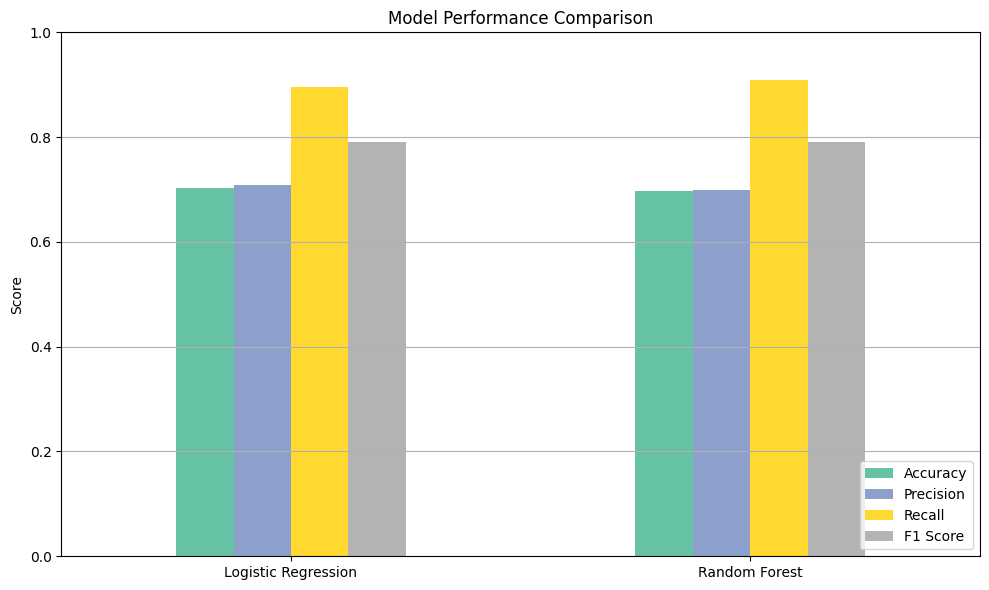

In [ ]:

metrics_df = pd.DataFrame({model: {
    "Accuracy": metrics["Accuracy"],
    "Precision": metrics["Precision"],
    "Recall": metrics["Recall"],
    "F1 Score": metrics["F1 Score"]
} for model, metrics in results.items()}).T

metrics_df.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


Confusion Matrix for Best Model

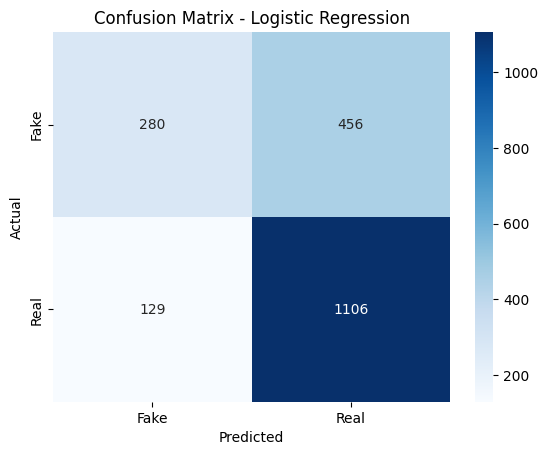

In [ ]:

best_model_name = max(results, key=lambda x: results[x]['F1 Score'])
best_pred = results[best_model_name]['y_pred']
cm = confusion_matrix(y_test, best_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


 Model vs. Metrics

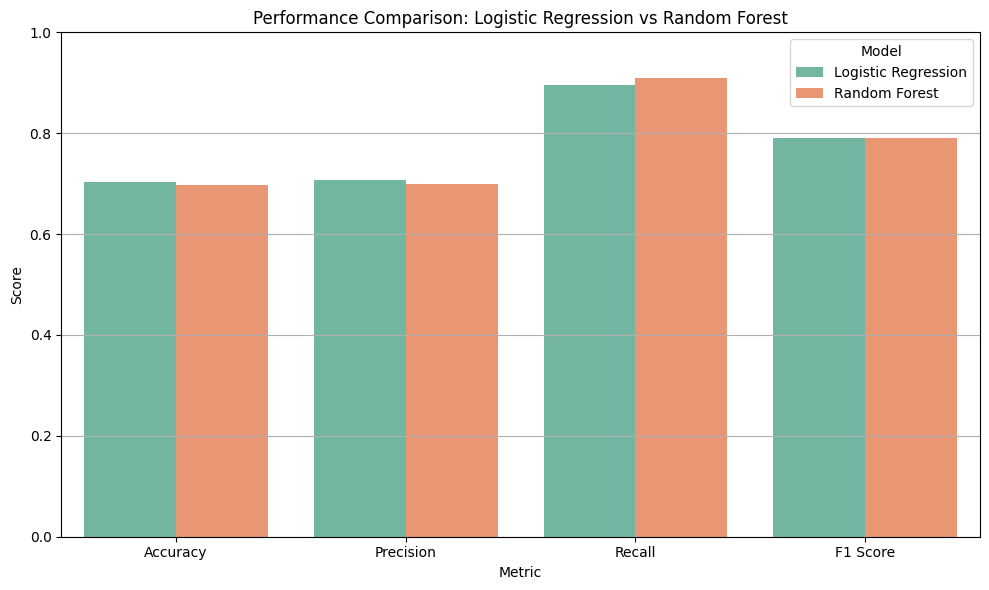

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


metrics_df = pd.DataFrame(results).T[['Accuracy', 'Precision', 'Recall', 'F1 Score']]


metrics_melted = metrics_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
metrics_melted.rename(columns={'index': 'Model'}, inplace=True)


plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_melted, x='Metric', y='Score', hue='Model', palette='Set2')

plt.title('Performance Comparison: Logistic Regression vs Random Forest')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Model')
plt.show()


Plotting the Confusion Matrix

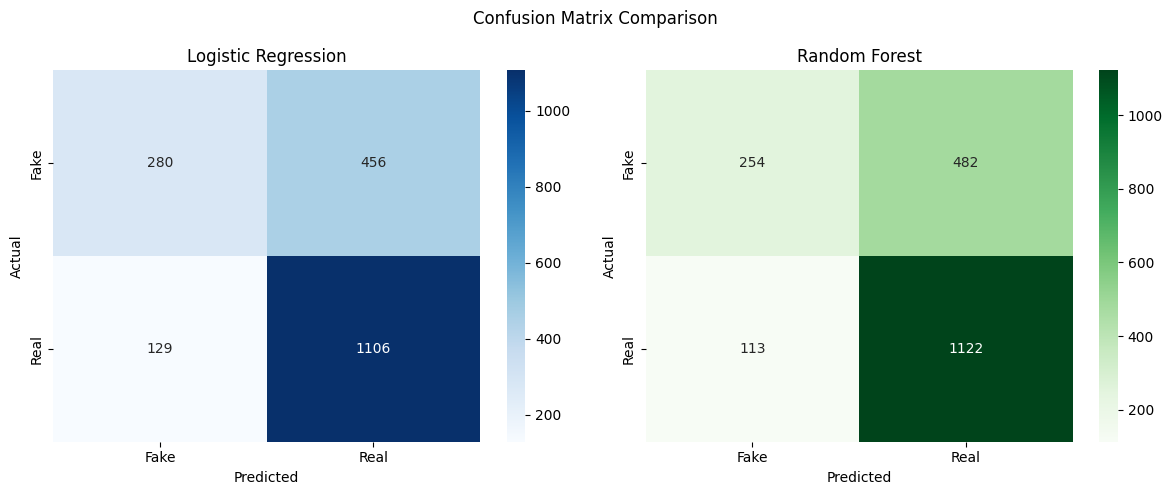

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred_lr = results["Logistic Regression"]["y_pred"]
y_pred_rf = results["Random Forest"]["y_pred"]


cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_lr, annot=True, fmt='d', cmap="Blues", ax=axes[0], xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Greens", ax=axes[1], xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.suptitle("Confusion Matrix Comparison")
plt.tight_layout()
plt.show()


Low-Confidence Predictions

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


assert "title" in df.columns and "label" in df.columns, "Missing required columns"


X_text = df["title"].str.lower().str.replace(r"[^a-zA-Z\s]", "", regex=True)
y = df["label"]


vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
X = vectorizer.fit_transform(X_text)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


models = {"Logistic Regression": log_reg}


y_probs = log_reg.predict_proba(X_test)[:, 1]

low_conf_mask = (y_probs >= 0.4) & (y_probs <= 0.6)


low_conf_df = pd.DataFrame({
    "Headline": X_text.iloc[y_test.index].values,
    "True_Label": y_test.values,
    "Predicted_Prob": y_probs,
    "Predicted_Class": [1 if p >= 0.5 else 0 for p in y_probs]
})


low_conf_df = low_conf_df[low_conf_mask]


low_conf_df.to_csv("low_confidence_predictions_logistic.csv", index=False)

print(f"Saved {len(low_conf_df)} low-confidence predictions.")


Saved 2 low-confidence predictions.


Feature Engineering

<ipython-input-17-65a65e975125>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=pd.concat([top_positive, top_negative]), palette="coolwarm")


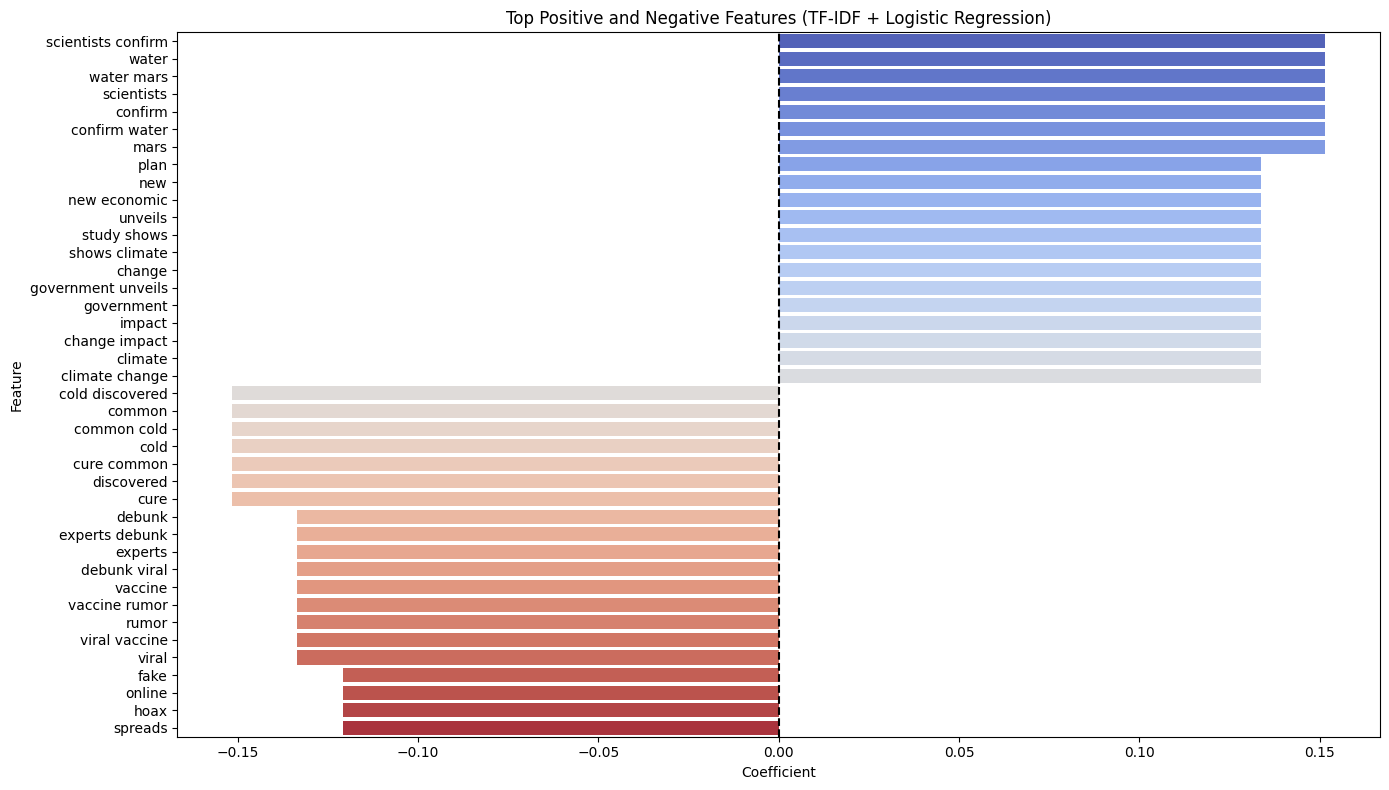

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


assert "title" in df.columns and "label" in df.columns, "Missing required columns"


X_text = df["title"].str.lower().str.replace(r"[^a-zA-Z\s]", "", regex=True)
y = df["label"]


vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(X_text)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_[0]


feat_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefs
})


top_n = 20
top_positive = feat_df.sort_values(by="Coefficient", ascending=False).head(top_n)
top_negative = feat_df.sort_values(by="Coefficient").head(top_n)


plt.figure(figsize=(14, 8))
sns.barplot(x="Coefficient", y="Feature", data=pd.concat([top_positive, top_negative]), palette="coolwarm")
plt.title("Top Positive and Negative Features (TF-IDF + Logistic Regression)")
plt.axvline(x=0, color='black', linestyle='--')
plt.tight_layout()
plt.show()
